# Human Pose Estimation with MediaPipe

Have you ever observed the precision and controlled rhythm in Tiger Woods’ golf swing, or Roberto Carlos’ meticulous preparation, adjusting the ball and counting steps before striking with his left foot at impressive speeds in soccer?

<img src="https://sigmoidal.ai/wp-content/uploads/2023/07/Roberto-Carlos-Pose-Estimation.png" width=600>

Perhaps you've admired the principal dancer of the Bolshoi Ballet perfecting a *fouetté*, a classic ballet movement, carefully adjusting her positioning to optimize the spin.

Each sport, each movement, is a unique choreography of positions and postures—a complex ballet of joints and limbs defying gravity and resistance. The key to understanding and refining these movements lies in posture and gesture analysis—a fascinating field known as "***Pose Estimation***."

#### **What is Pose Estimation?**

*Pose Estimation* is an area within computer vision focused on detecting human orientations and postures in images and videos. Essentially, it’s a method to identify the position of certain key points on a human body—such as elbows, knees, or the tip of the nose. Using these points, a *Pose Estimation* system can then draw a “skeleton” of the human body, showing the relative positions of limbs and joints.

#### **General Applications of Pose Estimation**

*Pose Estimation* has a wide range of applications, from gesture recognition systems and behavior analysis to character creation in games and 3D animation. Additionally, it’s a crucial element for technologies like *Augmented Reality (AR)* and *Virtual Reality (VR)*, enabling intuitive human interaction with virtual environments.

#### **Pose Estimation in Sports**

In sports, *Pose Estimation* offers a unique opportunity to analyze and refine athletic performance. For example, it can be used to detect flaws in Tiger Woods’ swing technique, improve a swimmer’s posture, or optimize a sprinter’s stance before the race start. By providing accurate and real-time visual feedback, *Pose Estimation* can help athletes maximize performance and prevent injuries.

Throughout this project, we will explore the fundamental concepts of *Pose Estimation* and how they can be applied specifically in the world of sports. Let’s embark together on this fascinating journey through the ballet of sports biomechanics!


## Understanding MediaPipe

*MediaPipe* is an open-source platform for creating situational perception solutions. Provided by Google, it offers a framework for building applications and solutions that require multimedia data stream processing, including (but not limited to) video, audio, and sensor data. *MediaPipe* was developed with the mission of accelerating the development cycle of multimedia applications across various platforms.

For the *Pose Estimation* task, we will use *MediaPipe* to:

1. **Detect and draw pose landmarks**: *MediaPipe* will allow us to identify key points on the body, or *landmarks*, and draw them on our images and videos for more intuitive visualization.
2. **Draw landmark connections**: In addition to detecting individual *landmarks*, *MediaPipe* also allows us to draw connections between them, making it easier to understand the overall posture.
3. **Get the pixel coordinates of each landmark**: With *MediaPipe*, we can extract the pixel coordinates corresponding to each *landmark*, enabling more detailed analysis.

### Pose Landmark Model - BlazePose GHUM 3D

The pose landmark model we’ll use is *BlazePose GHUM 3D*, also provided by Google through *MediaPipe*. This model provides a full 3D representation of the human body, including 33 *landmarks* covering the entire body.<br><br>

<img src="https://sigmoidal.ai/wp-content/uploads/2023/07/68747470733a2f2f6d65646961706970652e6465762f696d616765732f6d6f62696c652f706f73655f747261636b696e675f66756c6c5f626f64795f6c616e646d61726b732e706e67.png" width=500>

<br>The [*BlazePose GHUM 3D*](https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md) model was trained on a large dataset of human poses and movements, enabling it to accurately predict body *landmarks* even in various poses and orientations. This makes it a powerful tool for our sports performance analyses. Here is the full list of *landmarks*:

* 0 - Nose
* 1 - Left eye (inner)
* 2 - Left eye
* 3 - Left eye (outer)
* 4 - Right eye (inner)
* 5 - Right eye
* 6 - Right eye (outer)
* 7 - Left ear
* 8 - Right ear
* 9 - Mouth (left side)
* 10 - Mouth (right side)
* 11 - Left shoulder
* 12 - Right shoulder
* 13 - Left elbow
* 14 - Right elbow
* 15 - Left wrist
* 16 - Right wrist
* 17 - Left pinky
* 18 - Right pinky
* 19 - Left index finger
* 20 - Right index finger
* 21 - Left thumb
* 22 - Right thumb
* 23 - Left hip
* 24 - Right hip
* 25 - Left knee
* 26 - Right knee
* 27 - Left ankle
* 28 - Right ankle
* 29 - Left heel
* 30 - Right heel
* 31 - Left big toe
* 32 - Right big toe

Each of these *landmarks* represents a key point on the human body, allowing us to analyze body pose and movement comprehensively and accurately.


## Pipeline para estimação de pose

In [6]:
# instalação das bibliotecas necessárias
!pip install --upgrade opencv-contrib-python -q
!pip install mediapipe -q




[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

%matplotlib inline

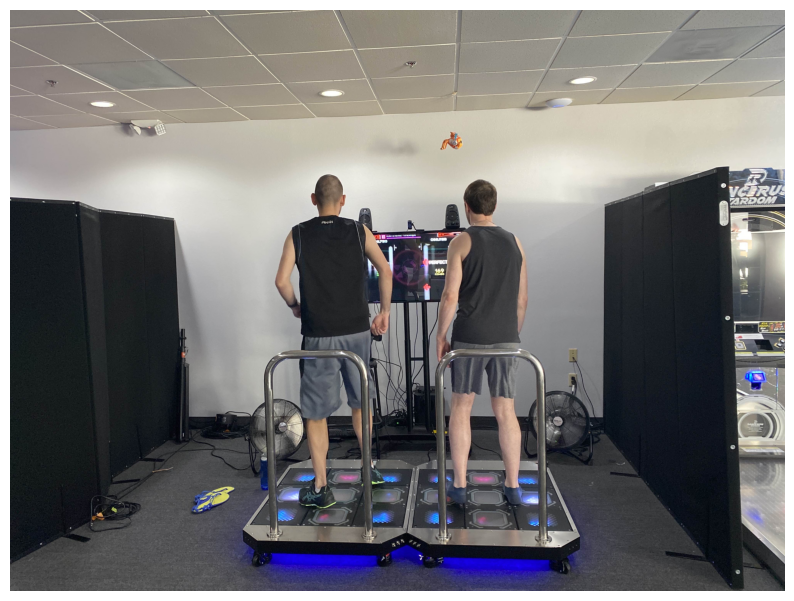

In [8]:
# Carregando a imagem usando OpenCV.
img = cv2.imread("'.jpg")

# Obtendo a largura e a altura da imagem.
img_width = img.shape[1]
img_height = img.shape[0]

# Criando uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[...,::-1])
plt.show()

In [9]:
# Inicializando os módulos Pose e Drawing do MediaPipe.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

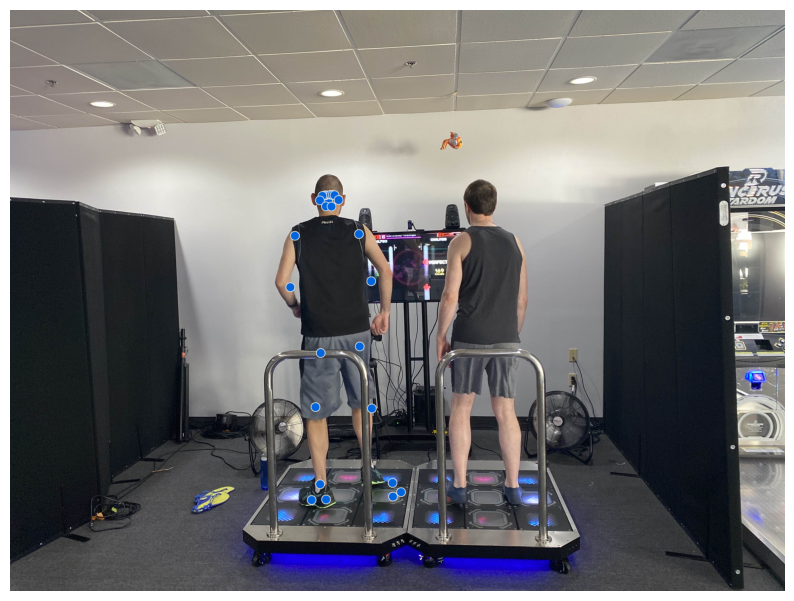

In [10]:
with mp_pose.Pose(static_image_mode=True) as pose:
    """
    Esta função utiliza a biblioteca MediaPipe para detectar e desenhar 'landmarks'
    (pontos de referência) em uma imagem. Os 'landmarks' são pontos de interesse
    que representam diferentes partes do corpo detectadas na imagem.

    Args:
        static_image_mode: um booleano para informar se a imagem é estática (True) ou sequencial (False).
    """

    # Faz uma cópia da imagem original.
    annotated_img = img.copy()

    # Processa a imagem.
    results = pose.process(img)

    # Define o raio do círculo para desenho dos 'landmarks'.
    # O raio é escalado como uma porcentagem da altura da imagem.
    circle_radius = int(.007 * img_height)

    # Especifica o estilo de desenho dos 'landmarks'.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)

    # Desenha os 'landmarks' na imagem.
    mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.pose_landmarks,
                              landmark_drawing_spec=point_spec)

# Cria uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[:, :, ::-1])
plt.show()


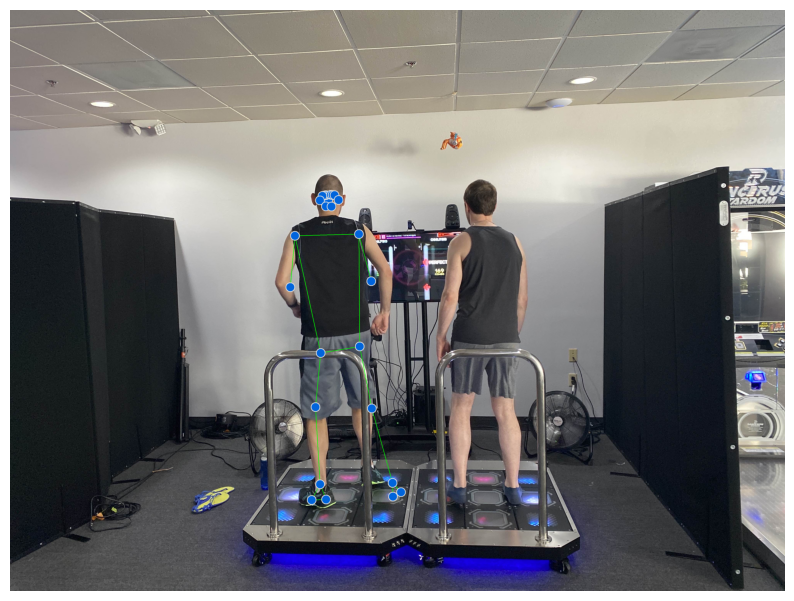

In [11]:
# Faz uma cópia da imagem original.
annotated_img = img.copy()

# Especifica o estilo de desenho das conexões dos landmarks.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)

# Desenha tanto os pontos dos landmarks quanto as conexões.
mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
    )

# Cria uma figura e um conjunto de eixos.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(annotated_img[...,::-1])
plt.show()


In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

Left knee coordinates: ( 1589 , 2068 )
Left ankle coordinates: ( 1613 , 2469 )
Left heel coordinates: ( 1644 , 2548 )
Left foot index coordinates: ( 1569 , 2551 )


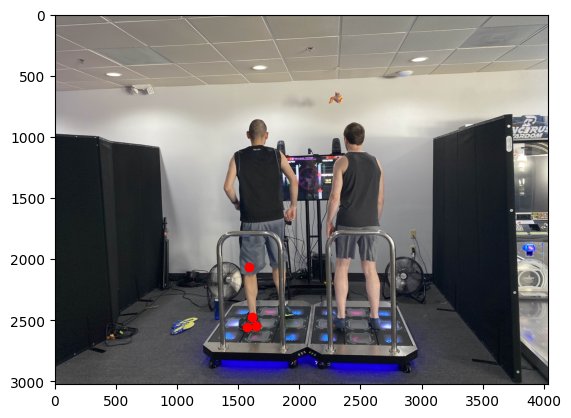

In [13]:
# Seleciona as coordenadas dos pontos de interesse.
l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)

# Imprime as coordenadas na tela.
print('Left knee coordinates: (', l_knee_x, ',', l_knee_y, ')')
print('Left ankle coordinates: (', l_ankle_x, ',', l_ankle_y, ')')
print('Left heel coordinates: (', l_heel_x, ',', l_heel_y, ')')
print('Left foot index coordinates: (', l_foot_index_x, ',', l_foot_index_y, ')')


# Exibindo um gráfico com os pontos selecionados.
fig, ax = plt.subplots()
ax.imshow(img[:, :, ::-1])
ax.plot([l_knee_x, l_ankle_x, l_heel_x, l_foot_index_x], [l_knee_y, l_ankle_y, l_heel_y, l_foot_index_y], 'ro')
plt.show()


In [14]:
cv2.imwrite("output.png", annotated_img)

True